<a href="https://colab.research.google.com/github/ethann0904/ethann0904/blob/main/EthanNgo_MSMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np    #Python packages like numpy, pandas, seaborn, and mathplotib.pyplot were imported
import pandas as pd         #into the code to help modify and display the data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import files #import dataset from https://doi.org/10.17632/8WK5HJX7X2.1
uploaded = files.upload()

Saving conversion_predictors_of_clinically_isolated_syndrome_to_multiple_sclerosis.csv to conversion_predictors_of_clinically_isolated_syndrome_to_multiple_sclerosis.csv


In [3]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['conversion_predictors_of_clinically_isolated_syndrome_to_multiple_sclerosis.csv']))
# Dataset is now stored in a Pandas Dataframe

In [4]:
df2.head() #see the first portion of the dataset

,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1.0,1.0,1
1,1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,2.0,2.0,1
2,2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1.0,1.0,1
3,3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1.0,1.0,1
4,4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1.0,1.0,1


In [5]:
df2.tail() #see the last portion of the dataset

,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
268,268,2,31,8.0,3,1,9.0,2,0,0,0,0,0,0,0,0,0,NaN,NaN,2
269,269,1,21,15.0,3,3,5.0,2,1,0,0,0,0,0,0,0,1,NaN,NaN,2
270,270,2,19,12.0,3,3,13.0,2,0,1,1,1,0,0,0,0,1,NaN,NaN,2
271,271,2,32,15.0,3,3,15.0,2,1,1,1,1,0,1,1,1,0,NaN,NaN,2
272,272,2,77,6.0,3,3,2.0,1,0,0,1,0,0,0,0,0,0,NaN,NaN,2


In [6]:
df2.group.value_counts(normalize = True) #see the percentage of patients that have MS and those that do not
                                            #(value counts using normalize = True)

2    0.542125
1    0.457875
Name: group, dtype: float64

In [7]:
df_filtered = df2.drop(['Initial_EDSS', 'Final_EDSS', 'Age', 'Breastfeeding', 'Schooling'], axis=1)
# dropping columns that do not contain biological/neurological variables
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

In [8]:
df_filtered #the dataset with dropped values

,Unnamed: 0,Gender,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,group
0,0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1
1,1,1,2,10.0,2,1,1,0,1,0,0,0,0,1,1
2,2,1,1,3.0,1,1,0,0,0,0,0,1,0,0,1
3,3,2,1,7.0,2,1,0,1,1,0,1,1,0,0,1
4,4,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,268,2,1,9.0,2,0,0,0,0,0,0,0,0,0,2
269,269,1,3,5.0,2,1,0,0,0,0,0,0,0,1,2
270,270,2,3,13.0,2,0,1,1,1,0,0,0,0,1,2
271,271,2,3,15.0,2,1,1,1,1,0,1,1,1,0,2


In [9]:
male_filtered = df_filtered[df_filtered.Gender==1] #segmenting the dataset by male and female
female_filtered = df_filtered[df_filtered.Gender==2] #to get different relative importance for each sex

In [10]:
male_filtered #dataset of patients that are males

,Unnamed: 0,Gender,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,group
0,0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1
1,1,1,2,10.0,2,1,1,0,1,0,0,0,0,1,1
2,2,1,1,3.0,1,1,0,0,0,0,0,1,0,0,1
5,5,1,1,6.0,2,0,1,0,0,0,1,0,1,0,1
8,8,1,1,8.0,2,0,1,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,255,1,3,7.0,2,2,0,0,0,0,0,0,0,0,2
256,256,1,1,2.0,1,2,0,0,0,0,0,0,0,0,2
261,261,1,1,8.0,1,2,1,1,0,0,0,0,0,1,2
264,264,1,1,1.0,1,0,0,0,0,0,1,1,1,0,2


In [11]:
female_filtered #dataset of patients that are females

,Unnamed: 0,Gender,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,group
3,3,2,1,7.0,2,1,0,1,1,0,1,1,0,0,1
4,4,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1
6,6,2,1,14.0,2,0,1,0,1,0,1,1,0,1,1
7,7,2,1,14.0,2,0,1,1,0,0,1,1,1,1,1
9,9,2,1,8.0,2,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,267,2,3,10.0,2,0,0,0,0,0,0,0,0,0,2
268,268,2,1,9.0,2,0,0,0,0,0,0,0,0,0,2
270,270,2,3,13.0,2,0,1,1,1,0,0,0,0,1,2
271,271,2,3,15.0,2,1,1,1,1,0,1,1,1,0,2


In [12]:
female_filtered.drop('Unnamed: 0', axis=1, inplace=True) #dropped 'unnamed' column
female_filtered.tail()

<ipython-input-12-be405ac5d557>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_filtered.drop('Unnamed: 0', axis=1, inplace=True) #dropped 'unnamed' column


,Gender,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,group
267,2,3,10.0,2,0,0,0,0,0,0,0,0,0,2
268,2,1,9.0,2,0,0,0,0,0,0,0,0,0,2
270,2,3,13.0,2,0,1,1,1,0,0,0,0,1,2
271,2,3,15.0,2,1,1,1,1,0,1,1,1,0,2
272,2,3,2.0,1,0,0,1,0,0,0,0,0,0,2


In [13]:
female_filtered #visualize the dataset of the segmented female dataset

,Gender,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,group
3,2,1,7.0,2,1,0,1,1,0,1,1,0,0,1
4,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1
6,2,1,14.0,2,0,1,0,1,0,1,1,0,1,1
7,2,1,14.0,2,0,1,1,0,0,1,1,1,1,1
9,2,1,8.0,2,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,2,3,10.0,2,0,0,0,0,0,0,0,0,0,2
268,2,1,9.0,2,0,0,0,0,0,0,0,0,0,2
270,2,3,13.0,2,0,1,1,1,0,0,0,0,1,2
271,2,3,15.0,2,1,1,1,1,0,1,1,1,0,2


In [14]:
female_filtered['Initial_Symptom'] = female_filtered['Initial_Symptom'].fillna(female_filtered['Initial_Symptom'].mode()[0])
#fill in N/A values in initial symptom column to zero

<ipython-input-14-7bebd45e8c4b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_filtered['Initial_Symptom'] = female_filtered['Initial_Symptom'].fillna(female_filtered['Initial_Symptom'].mode()[0])


In [15]:
from sklearn.model_selection import train_test_split
#using sklearn.model to split the data into two categories: train and test set

In [16]:
X = female_filtered.iloc[:,:-1] #filters and subset the data
y = female_filtered.iloc[:,-1]

In [17]:
X #visualize x values of the female dataset

,Gender,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI
3,2,1,7.0,2,1,0,1,1,0,1,1,0,0
4,2,1,6.0,2,0,1,0,0,0,1,0,0,0
6,2,1,14.0,2,0,1,0,1,0,1,1,0,1
7,2,1,14.0,2,0,1,1,0,0,1,1,1,1
9,2,1,8.0,2,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,2,3,10.0,2,0,0,0,0,0,0,0,0,0
268,2,1,9.0,2,0,0,0,0,0,0,0,0,0
270,2,3,13.0,2,0,1,1,1,0,0,0,0,1
271,2,3,15.0,2,1,1,1,1,0,1,1,1,0


In [18]:
y #visualize the y values of the female dataset

3      1
4      1
6      1
7      1
9      1
      ..
267    2
268    2
270    2
271    2
272    2
Name: group, Length: 168, dtype: int64

In [19]:
X_train, X_test, y_train, y_test =train_test_split(X, y,test_size=0.3, random_state=0, stratify=y)
#split the code into a train and test set. The test set was 30% of the original dataset


In [20]:
from sklearn.preprocessing import StandardScaler


In [21]:
scaler = StandardScaler() #StandardScaler() standardize and transforms the data so Random Forest can be used


In [22]:
X_train = scaler.fit_transform(X_train) #scaler used to transform the x_train


In [23]:
X_test = scaler.transform(X_test) #scaler used to transform the x_test


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn import metrics


In [25]:
forest = RandomForestClassifier() #Random Forest method to classify and predict


In [26]:
forest.fit(X_train, y_train) #training the values on the X_train and y_train


RandomForestClassifier()

In [27]:
print(forest.feature_importances_) #identifying the relative importance of certain factors of the dataset


[0.         0.07688403 0.14862904 0.02685241 0.07893238 0.03943357
 0.04175608 0.03843529 0.02181269 0.33955942 0.02962779 0.11437335
 0.04370395]


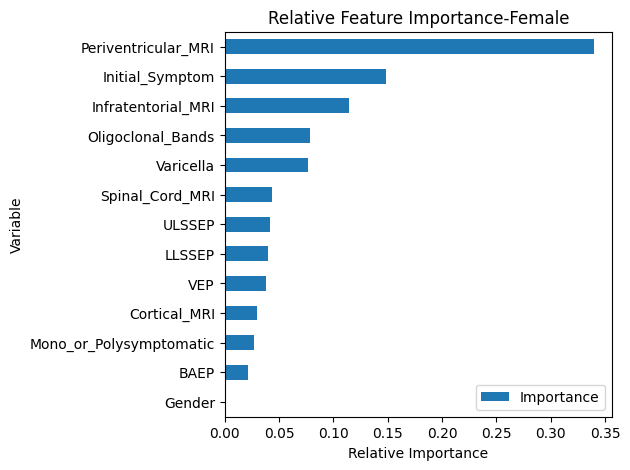

In [28]:
df_imp_female = pd.DataFrame({'Importance': list(forest.feature_importances_)}, index=X.columns)
df_imp_sorted_female = df_imp_female.sort_values(by=('Importance'), ascending=True)
df_imp_sorted_female.plot.barh(figsize=(5,5))
plt.title('Relative Feature Importance-Female') #using pandas to organize the data
plt.xlabel('Relative Importance')               #using math.plob to visualize the relative importance
plt.ylabel('Variable')
plt.legend(loc=4)
plt.show()

In [29]:
forest_pred = forest.predict(X_test) #using random forest and the train set to predict the values of x_test set


In [30]:
cm = pd.DataFrame(confusion_matrix(y_test, forest_pred))
cm['Total'] = np.sum(cm, axis=1)
cm = cm.append(np.sum(cm, axis=0), ignore_index=True)
cm.columns = ['Predicted No', 'Predicted Yes', 'Total']
cm = cm.set_index([['Actual No', 'Actual Yes', 'Total']])
print(cm)

#using pandas to display the results of the prediction
#final results displayed down below. The predictions based on the Random Forest deep learning algorithm

            Predicted No  Predicted Yes  Total
Actual No             14              5     19
Actual Yes             9             23     32
Total                 23             28     51


<ipython-input-30-822f516bd086>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cm = cm.append(np.sum(cm, axis=0), ignore_index=True)


In [31]:
target_names = ['CDMS', 'Non-CDMS']
print(classification_report(y_test, forest_pred, target_names=target_names))
#the targeted predicted values (diagnosis of MS patients [both male and female])
#prediction for clinically diagnosed patients is 62% accurate; prediction for non-clinically diagnosed patients is 85% accurate

              precision    recall  f1-score   support

        CDMS       0.61      0.74      0.67        19
    Non-CDMS       0.82      0.72      0.77        32

    accuracy                           0.73        51
   macro avg       0.72      0.73      0.72        51
weighted avg       0.74      0.73      0.73        51



Starting code for male only data



In [32]:
male_filtered #visualizing the male segmented dataset

,Unnamed: 0,Gender,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,group
0,0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1
1,1,1,2,10.0,2,1,1,0,1,0,0,0,0,1,1
2,2,1,1,3.0,1,1,0,0,0,0,0,1,0,0,1
5,5,1,1,6.0,2,0,1,0,0,0,1,0,1,0,1
8,8,1,1,8.0,2,0,1,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,255,1,3,7.0,2,2,0,0,0,0,0,0,0,0,2
256,256,1,1,2.0,1,2,0,0,0,0,0,0,0,0,2
261,261,1,1,8.0,1,2,1,1,0,0,0,0,0,1,2
264,264,1,1,1.0,1,0,0,0,0,0,1,1,1,0,2


In [33]:
male_filtered.drop('Unnamed: 0', axis=1, inplace=True) #dropping 'unnamed' column
male_filtered.tail()

<ipython-input-33-3428fef5d6bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_filtered.drop('Unnamed: 0', axis=1, inplace=True) #dropping 'unnamed' column


,Gender,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,group
255,1,3,7.0,2,2,0,0,0,0,0,0,0,0,2
256,1,1,2.0,1,2,0,0,0,0,0,0,0,0,2
261,1,1,8.0,1,2,1,1,0,0,0,0,0,1,2
264,1,1,1.0,1,0,0,0,0,0,1,1,1,0,2
269,1,3,5.0,2,1,0,0,0,0,0,0,0,1,2


In [34]:
male_filtered['Initial_Symptom'] = male_filtered['Initial_Symptom'].fillna(male_filtered['Initial_Symptom'].mode()[0])
#fill in N/A values in initial symptom column to zero

<ipython-input-34-5e6ce7493e43>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_filtered['Initial_Symptom'] = male_filtered['Initial_Symptom'].fillna(male_filtered['Initial_Symptom'].mode()[0])


In [35]:
from sklearn.model_selection import train_test_split


In [36]:
X_male = male_filtered.iloc[:,:-1] #filters and subset the data
y_male = male_filtered.iloc[:,-1]

In [37]:
X_male #the x values of the male segmented list

,Gender,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI
0,1,1,2.0,1,0,1,1,0,0,0,1,0,1
1,1,2,10.0,2,1,1,0,1,0,0,0,0,1
2,1,1,3.0,1,1,0,0,0,0,0,1,0,0
5,1,1,6.0,2,0,1,0,0,0,1,0,1,0
8,1,1,8.0,2,0,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,1,3,7.0,2,2,0,0,0,0,0,0,0,0
256,1,1,2.0,1,2,0,0,0,0,0,0,0,0
261,1,1,8.0,1,2,1,1,0,0,0,0,0,1
264,1,1,1.0,1,0,0,0,0,0,1,1,1,0


In [38]:
y_male #the y values of male segmented list

0      1
1      1
2      1
5      1
8      1
      ..
255    2
256    2
261    2
264    2
269    2
Name: group, Length: 105, dtype: int64

In [39]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_male, y_male,test_size=0.3, random_state=0, stratify=y_male)
#split the code into a train and test set. The test set was 30% of the original dataset


In [40]:
from sklearn.preprocessing import StandardScaler


In [41]:
scaler = StandardScaler()  #StandardScaler() standardize and transforms the data so Random Forest can be used


In [42]:
X_train_1 = scaler.fit_transform(X_train_1)  #scaler used to transform the x_train_1


In [43]:
X_test_1 = scaler.transform(X_test_1) #scaler used to transform the x_test_1


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn import metrics


In [45]:
forest_1 = RandomForestClassifier() #Random Forest method to classify and predict


In [46]:
forest_1.fit(X_train_1, y_train_1)  #training the values on the X_train and y_train


RandomForestClassifier()

In [47]:
print(forest_1.feature_importances_) #identifying the relative importance of certain factors of the dataset


[0.         0.11580157 0.26441061 0.05974588 0.10117797 0.05477228
 0.05180436 0.04724795 0.03292383 0.0664529  0.07182232 0.09734518
 0.03649514]


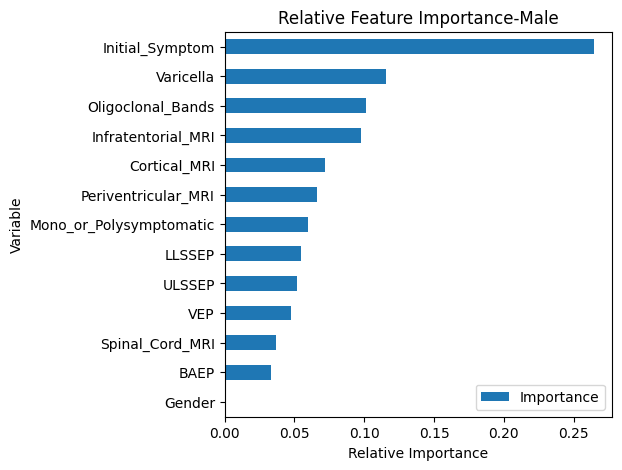

In [48]:
df_imp_male = pd.DataFrame({'Importance': list(forest_1.feature_importances_)}, index=X.columns)
df_imp_sorted_male = df_imp_male.sort_values(by=('Importance'), ascending=True)
df_imp_sorted_male.plot.barh(figsize=(5,5))   #using pandas to organize the data
plt.title('Relative Feature Importance-Male') #using math.plob to visualize the relative importance
plt.xlabel('Relative Importance')
plt.ylabel('Variable')
plt.legend(loc=4)
plt.show()

In [49]:
#end of code